In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set a random seed for reproducibility
np.random.seed(42)

# Generate dummy data
months = pd.date_range(start='2023-01-01', end='2023-12-31', freq='ME').strftime('%Y-%m').tolist()

data = {
    "Month": months,
    "Electricity_Usage_kWh": np.random.randint(10000, 20000, len(months)),
    "Gas_Usage_kWh": np.random.randint(5000, 10000, len(months)),
    "Renewable_Usage_kWh": np.random.randint(2000, 5000, len(months)),
    "CO2_Emissions_Tons": np.random.uniform(100, 300, len(months)),
    "Waste_Generated_Tons": np.random.uniform(50, 150, len(months)),
    "Waste_Recycled_Tons": np.random.uniform(20, 50, len(months)),
    "Waste_Composted_Tons": np.random.uniform(10, 30, len(months)),
    "Waste_Landfilled_Tons": np.random.uniform(10, 50, len(months)),
    "Units_Produced": np.random.randint(1000, 5000, len(months)),
}

df = pd.DataFrame(data)

# Calculate efficiency metrics
df["Energy_Efficiency"] = df["Units_Produced"] / (df["Electricity_Usage_kWh"] + df["Gas_Usage_kWh"])
df["Waste_to_Recycling_Ratio"] = df["Waste_Recycled_Tons"] / df["Waste_Generated_Tons"]
df["Emissions_per_Unit"] = df["CO2_Emissions_Tons"] / df["Units_Produced"]


df.to_csv("sustainability_data00.csv", index=False)
df.head()


,Month,Electricity_Usage_kWh,Gas_Usage_kWh,Renewable_Usage_kWh,CO2_Emissions_Tons,Waste_Generated_Tons,Waste_Recycled_Tons,Waste_Composted_Tons,Waste_Landfilled_Tons,Units_Produced,Energy_Efficiency,Waste_to_Recycling_Ratio,Emissions_per_Unit
0,2023-01,17270,7391,4747,190.099850,89.106061,29.796223,13.305339,46.598387,3690,0.149629,0.334391,0.051518
1,2023-02,10860,7433,2975,102.652992,68.223609,37.113319,10.312728,44.001543,4840,0.264582,0.543995,0.021209
2,2023-03,15390,6184,3806,288.440351,125.536141,35.625028,18.468030,27.978027,2028,0.094002,0.283783,0.142229
3,2023-04,15191,9555,2189,212.657644,92.515587,48.835161,17.897630,13.816405,4289,0.173321,0.527859,0.049582
4,2023-05,15734,8385,4734,177.083301,70.794166,45.336015,15.869763,24.832730,1502,0.062275,0.640392,0.117898


In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics to detect outliers
summary_stats = df.describe()


missing_values, summary_stats

(Month                       0
 Electricity_Usage_kWh       0
 Gas_Usage_kWh               0
 Renewable_Usage_kWh         0
 CO2_Emissions_Tons          0
 Waste_Generated_Tons        0
 Waste_Recycled_Tons         0
 Waste_Composted_Tons        0
 Waste_Landfilled_Tons       0
 Units_Produced              0
 Energy_Efficiency           0
 Waste_to_Recycling_Ratio    0
 Emissions_per_Unit          0
 dtype: int64,
        Electricity_Usage_kWh  Gas_Usage_kWh  Renewable_Usage_kWh  \
 count              12.000000      12.000000            12.000000   
 mean            14329.666667    7664.416667          3608.333333   
 std              2703.110778    1382.409258           908.175627   
 min             10466.000000    5474.000000          2189.000000   
 25%             11478.750000    6831.250000          2892.750000   
 50%             15290.500000    7495.500000          3667.000000   
 75%             15866.750000    8568.000000          4234.500000   
 max             18322.000000 

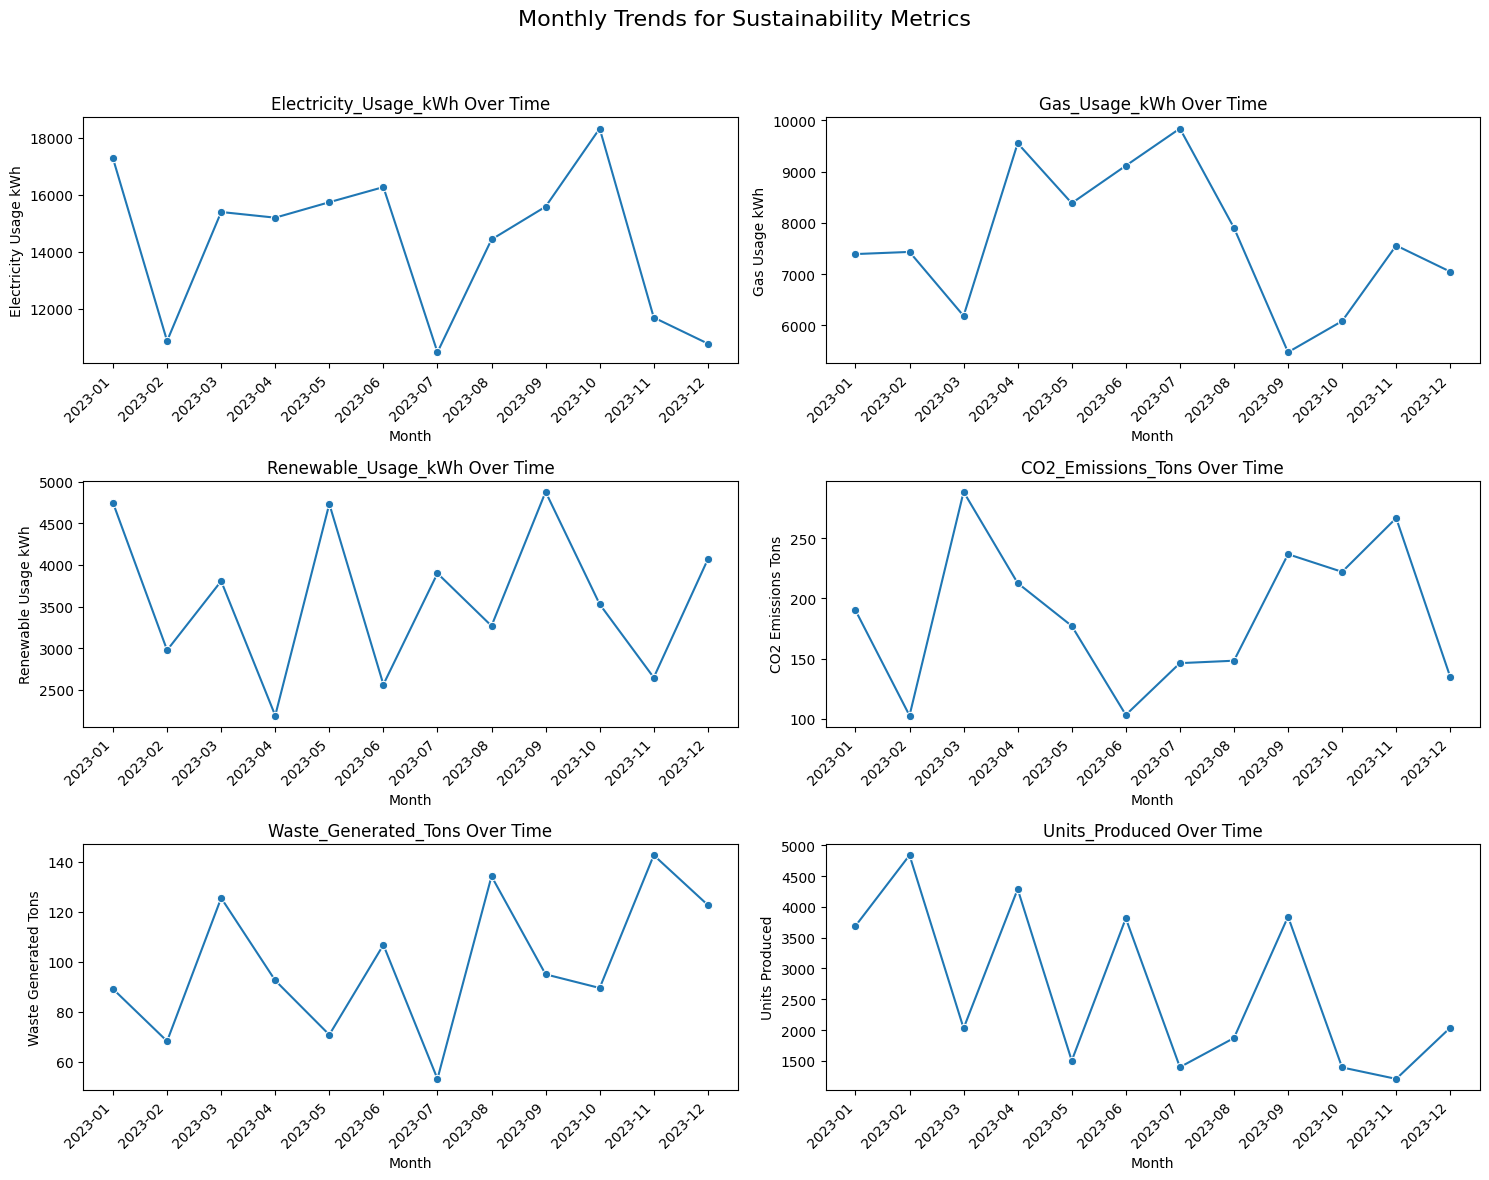

In [3]:
# Plot trends over time for selected columns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Monthly Trends for Sustainability Metrics', fontsize=16)

columns_to_plot = [
    "Electricity_Usage_kWh",
    "Gas_Usage_kWh",
    "Renewable_Usage_kWh",
    "CO2_Emissions_Tons",
    "Waste_Generated_Tons",
    "Units_Produced"
]

for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.lineplot(x=df["Month"], y=df[col], ax=ax, marker='o')
    ax.set_title(f"{col} Over Time")
    ax.set_xticks(range(len(df["Month"])))
    ax.set_xticklabels(df["Month"], rotation=45, ha='right')
    ax.set_xlabel("Month")
    ax.set_ylabel(col.replace('_', ' '))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [4]:
# Descriptive analysis: Calculate averages, totals, and year-over-year changes
descriptive_stats = {
    "Metric": [
        "Electricity Usage (kWh)", 
        "Gas Usage (kWh)", 
        "Renewable Usage (kWh)", 
        "CO2 Emissions (Tons)", 
        "Waste Generated (Tons)", 
        "Waste Recycled (Tons)", 
        "Waste Composted (Tons)", 
        "Waste Landfilled (Tons)", 
        "Units Produced"
    ],
    "Average": [
        df["Electricity_Usage_kWh"].mean(),
        df["Gas_Usage_kWh"].mean(),
        df["Renewable_Usage_kWh"].mean(),
        df["CO2_Emissions_Tons"].mean(),
        df["Waste_Generated_Tons"].mean(),
        df["Waste_Recycled_Tons"].mean(),
        df["Waste_Composted_Tons"].mean(),
        df["Waste_Landfilled_Tons"].mean(),
        df["Units_Produced"].mean()
    ],
    "Total": [
        df["Electricity_Usage_kWh"].sum(),
        df["Gas_Usage_kWh"].sum(),
        df["Renewable_Usage_kWh"].sum(),
        df["CO2_Emissions_Tons"].sum(),
        df["Waste_Generated_Tons"].sum(),
        df["Waste_Recycled_Tons"].sum(),
        df["Waste_Composted_Tons"].sum(),
        df["Waste_Landfilled_Tons"].sum(),
        df["Units_Produced"].sum()
    ]
}

descriptive_df = pd.DataFrame(descriptive_stats)

# Calculate percentages for key sustainability metrics
renewable_percentage = (
    df["Renewable_Usage_kWh"].sum() / 
    (df["Electricity_Usage_kWh"].sum() + df["Gas_Usage_kWh"].sum())
) * 100

waste_recycled_percentage = (
    df["Waste_Recycled_Tons"].sum() / df["Waste_Generated_Tons"].sum()
) * 100

results = {
    "Renewable Energy Usage (%)": renewable_percentage,
    "Waste Recycled (%)": waste_recycled_percentage
}

descriptive_df, results


(                    Metric       Average          Total
 0  Electricity Usage (kWh)  14329.666667  171956.000000
 1          Gas Usage (kWh)   7664.416667   91973.000000
 2    Renewable Usage (kWh)   3608.333333   43300.000000
 3     CO2 Emissions (Tons)    185.706266    2228.475195
 4   Waste Generated (Tons)     99.182411    1190.188927
 5    Waste Recycled (Tons)     38.104626     457.255516
 6   Waste Composted (Tons)     18.650754     223.809042
 7  Waste Landfilled (Tons)     32.657810     391.893715
 8           Units Produced   2659.000000   31908.000000,
 {'Renewable Energy Usage (%)': 16.405927351674123,
  'Waste Recycled (%)': 38.41873382300836})

In [5]:
descriptive_df.head()

,Metric,Average,Total
0,Electricity Usage (kWh),14329.666667,171956.000000
1,Gas Usage (kWh),7664.416667,91973.000000
2,Renewable Usage (kWh),3608.333333,43300.000000
3,CO2 Emissions (Tons),185.706266,2228.475195
4,Waste Generated (Tons),99.182411,1190.188927


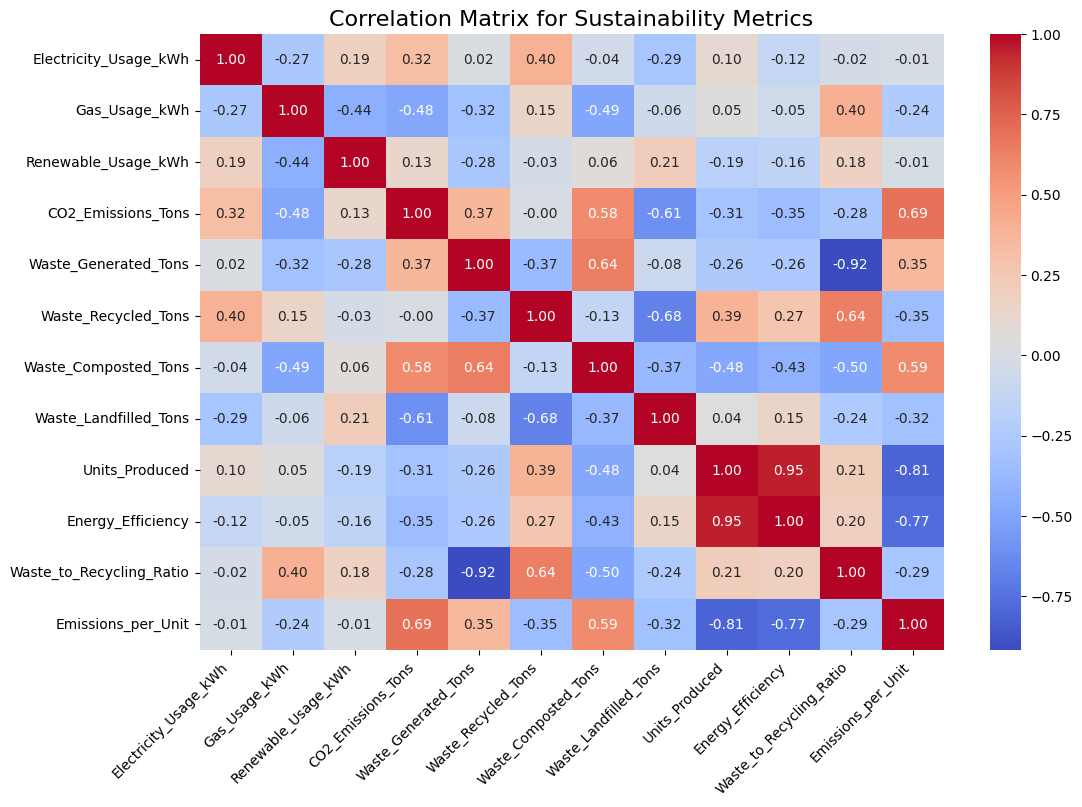

,Electricity_Usage_kWh,Gas_Usage_kWh,Renewable_Usage_kWh,CO2_Emissions_Tons,Waste_Generated_Tons,Waste_Recycled_Tons,Waste_Composted_Tons,Waste_Landfilled_Tons,Units_Produced,Energy_Efficiency,Waste_to_Recycling_Ratio,Emissions_per_Unit
Electricity_Usage_kWh,1.000000,-0.269687,0.189095,0.322739,0.016183,0.395206,-0.044332,-0.289277,0.103734,-0.119350,-0.020985,-0.007752
Gas_Usage_kWh,-0.269687,1.000000,-0.444282,-0.484474,-0.324501,0.150820,-0.492453,-0.057120,0.053991,-0.049418,0.402065,-0.238808
Renewable_Usage_kWh,0.189095,-0.444282,1.000000,0.127833,-0.279873,-0.032289,0.064128,0.206170,-0.191841,-0.158317,0.180511,-0.010420
CO2_Emissions_Tons,0.322739,-0.484474,0.127833,1.000000,0.369329,-0.002413,0.581818,-0.608458,-0.308964,-0.354399,-0.281150,0.686839
Waste_Generated_Tons,0.016183,-0.324501,-0.279873,0.369329,1.000000,-0.370469,0.644607,-0.082883,-0.255655,-0.262770,-0.917338,0.351667
Waste_Recycled_Tons,0.395206,0.150820,-0.032289,-0.002413,-0.370469,1.000000,-0.133747,-0.677022,0.387669,0.271344,0.638728,-0.348437
Waste_Composted_Tons,-0.044332,-0.492453,0.064128,0.581818,0.644607,-0.133747,1.000000,-0.371505,-0.481527,-0.425129,-0.497565,0.587983
Waste_Landfilled_Tons,-0.289277,-0.057120,0.206170,-0.608458,-0.082883,-0.677022,-0.371505,1.000000,0.041229,0.150055,-0.244085,-0.324193
Units_Produced,0.103734,0.053991,-0.191841,-0.308964,-0.255655,0.387669,-0.481527,0.041229,1.000000,0.954097,0.207879,-0.808510
Energy_Efficiency,-0.119350,-0.049418,-0.158317,-0.354399,-0.262770,0.271344,-0.425129,0.150055,0.954097,1.000000,0.197902,-0.768176


In [6]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Sustainability Metrics", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

correlation_matrix


In [26]:
# Calculate monthly KPIs
df["Renewable_Energy_%"] = (
    df["Renewable_Usage_kWh"] / (df["Electricity_Usage_kWh"] + df["Gas_Usage_kWh"]) * 100
)
df["Energy_Efficiency"] = df["Units_Produced"] / (
    df["Electricity_Usage_kWh"] + df["Gas_Usage_kWh"]
)
df["Emissions_per_Unit"] = df["CO2_Emissions_Tons"] / df["Units_Produced"]
df["Recycling_Rate_%"] = (
    df["Waste_Recycled_Tons"] / df["Waste_Generated_Tons"] * 100
)
df["Waste_Diversion_%"] = (
    (df["Waste_Recycled_Tons"] + df["Waste_Composted_Tons"])
    / df["Waste_Generated_Tons"]
    * 100
)

# Summarize KPIs
kpi_summary = df[
    [
        "Month",
        "Renewable_Energy_%",
        "Energy_Efficiency",
        "Emissions_per_Unit",
        "Recycling_Rate_%",
        "Waste_Diversion_%",
    ]
].copy()

kpi_summary.to_csv("kpi00.csv", index = False)
kpi_summary


,Month,Renewable_Energy_%,Energy_Efficiency,Emissions_per_Unit,Recycling_Rate_%,Waste_Diversion_%
0,2023-01,19.249017,0.149629,0.051518,33.439053,48.371078
1,2023-02,16.263051,0.264582,0.021209,54.399525,69.515595
2,2023-03,17.641606,0.094002,0.142229,28.378304,43.089629
3,2023-04,8.845874,0.173321,0.049582,52.785873,72.131403
4,2023-05,19.627679,0.062275,0.117898,64.039197,86.455964
5,2023-06,10.093767,0.150264,0.027056,39.729878,49.359543
6,2023-07,19.198385,0.068787,0.104638,68.115676,94.421903
7,2023-08,14.630542,0.083744,0.079254,28.013828,46.062784
8,2023-09,23.175945,0.182500,0.061596,51.547719,78.716341
9,2023-10,14.456646,0.057040,0.159482,42.686720,67.396761


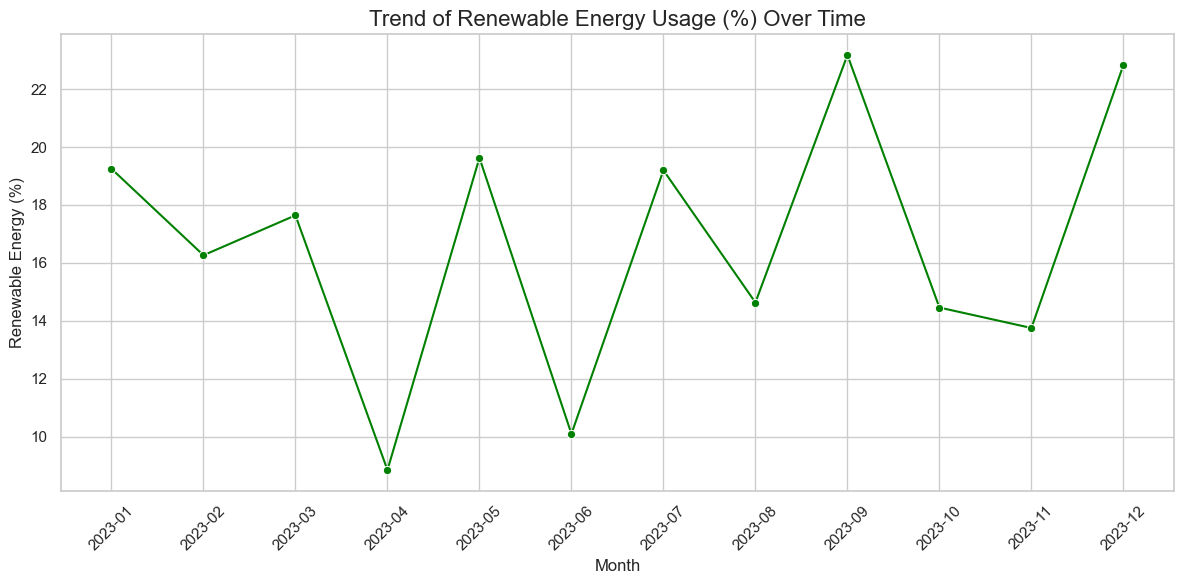

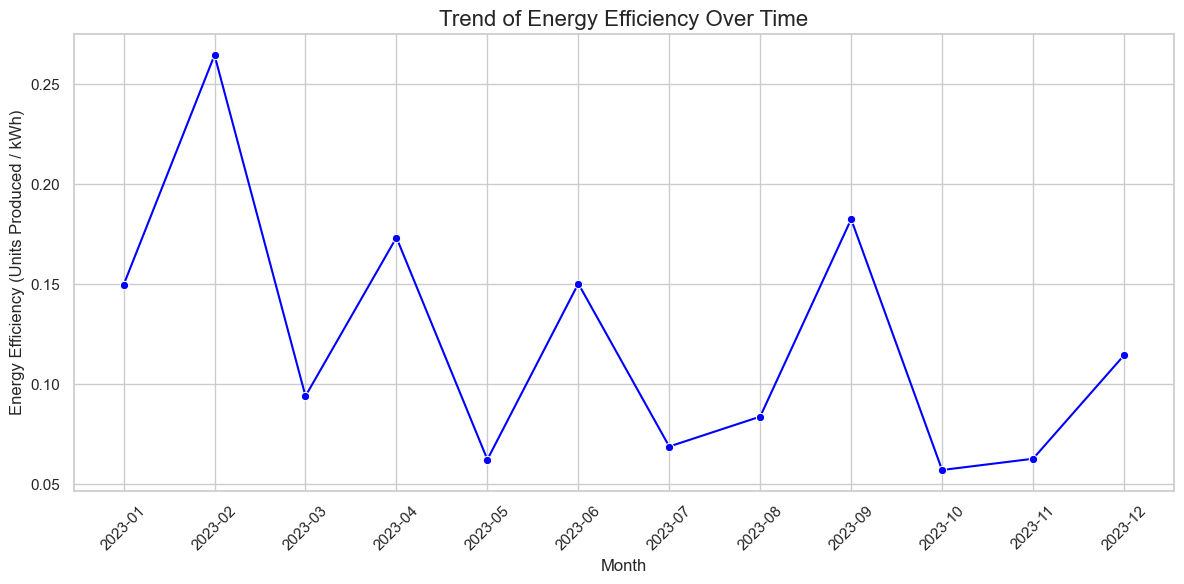

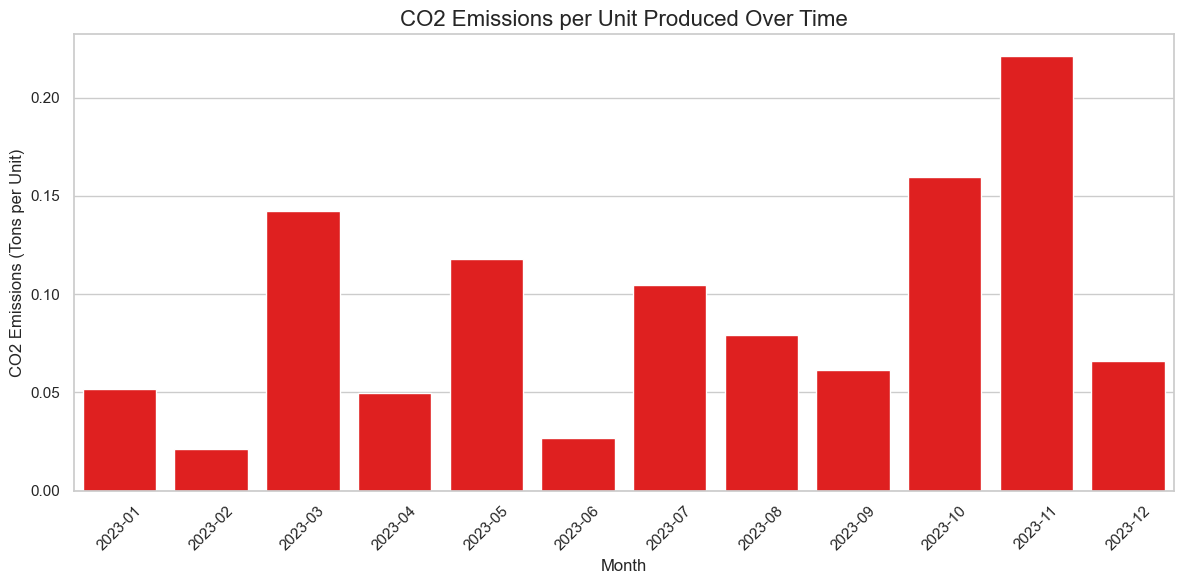

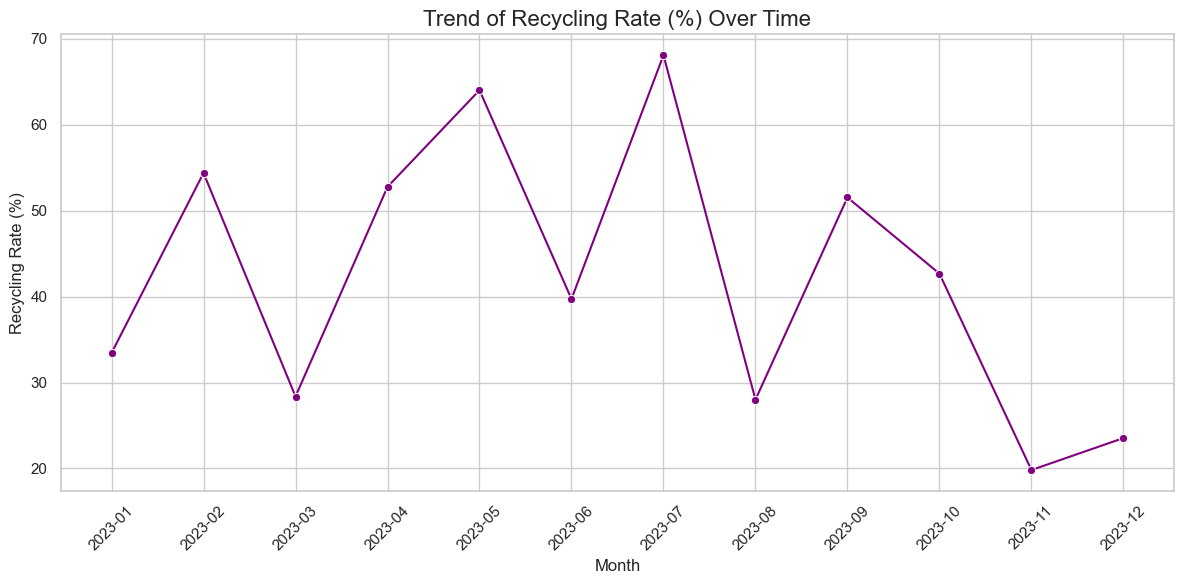

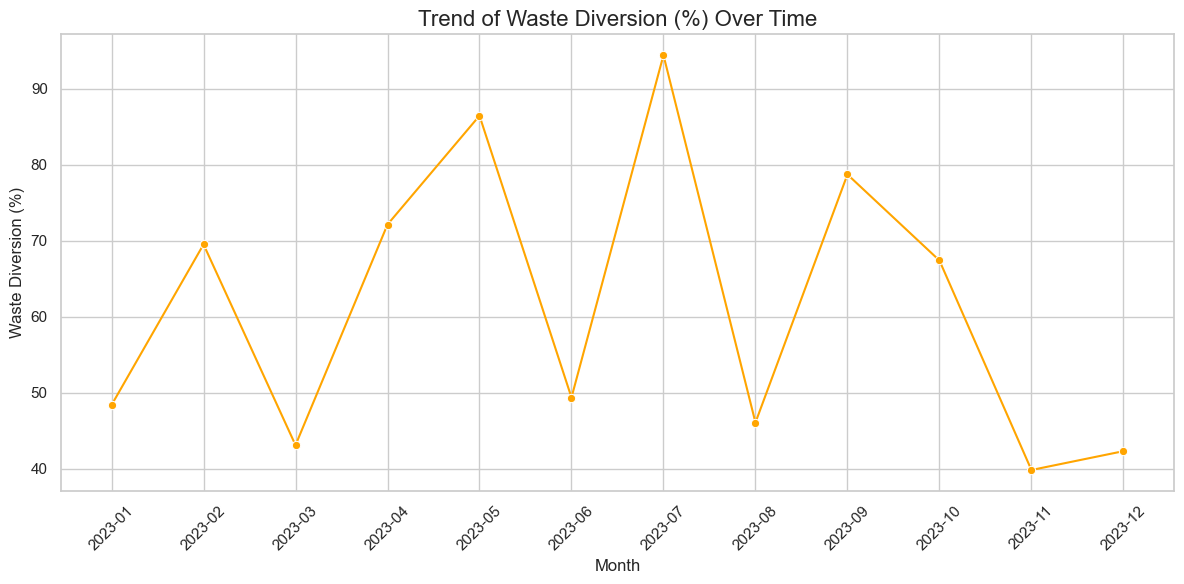

In [8]:


# Set a style for the plots
sns.set(style="whitegrid")

# Plot Renewable Energy %
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Renewable_Energy_%", marker="o", color="green")
plt.title("Trend of Renewable Energy Usage (%) Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Renewable Energy (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Energy Efficiency
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Energy_Efficiency", marker="o", color="blue")
plt.title("Trend of Energy Efficiency Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Energy Efficiency (Units Produced / kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Emissions per Unit
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Month", y="Emissions_per_Unit", color="Red")
plt.title("CO2 Emissions per Unit Produced Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("CO2 Emissions (Tons per Unit)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Recycling Rate %
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Recycling_Rate_%", marker="o", color="purple")
plt.title("Trend of Recycling Rate (%) Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Recycling Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Waste Diversion %
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Waste_Diversion_%", marker="o", color="orange")
plt.title("Trend of Waste Diversion (%) Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Waste Diversion (%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Define weights for each metric
weights = {
    "Renewable_Energy_%": 0.4,
    "Emissions_per_Unit": 0.3,  # Inverted
    "Waste_Diversion_%": 0.3,
}

# Normalize metrics to a 0-1 scale
scaler = MinMaxScaler()
df_normalized = df[["Renewable_Energy_%", "Emissions_per_Unit", "Waste_Diversion_%"]].copy()
df_normalized[["Renewable_Energy_%", "Waste_Diversion_%"]] = scaler.fit_transform(
    df_normalized[["Renewable_Energy_%", "Waste_Diversion_%"]]
)

# Invert Emissions per Unit for efficiency (higher values indicate better sustainability)
df_normalized["Emissions_per_Unit"] = 1 - scaler.fit_transform(
    df_normalized[["Emissions_per_Unit"]]
)

# Calculate SEI as a weighted sum
df["Sustainability_Efficiency_Index"] = (
    df_normalized["Renewable_Energy_%"] * weights["Renewable_Energy_%"]
    + df_normalized["Emissions_per_Unit"] * weights["Emissions_per_Unit"]
    + df_normalized["Waste_Diversion_%"] * weights["Waste_Diversion_%"]
)

# View the updated DataFrame
df[["Month", "Sustainability_Efficiency_Index"]]
sei_data = df[["Month", "Sustainability_Efficiency_Index"]]
sei_data


,Month,Sustainability_Efficiency_Index
0,2023-01,0.591892
1,2023-02,0.670201
2,2023-03,0.381861
3,2023-04,0.434951
4,2023-05,0.712073
5,2023-06,0.378482
6,2023-07,0.763758
7,2023-08,0.408664
8,2023-09,0.853097
9,2023-10,0.400608


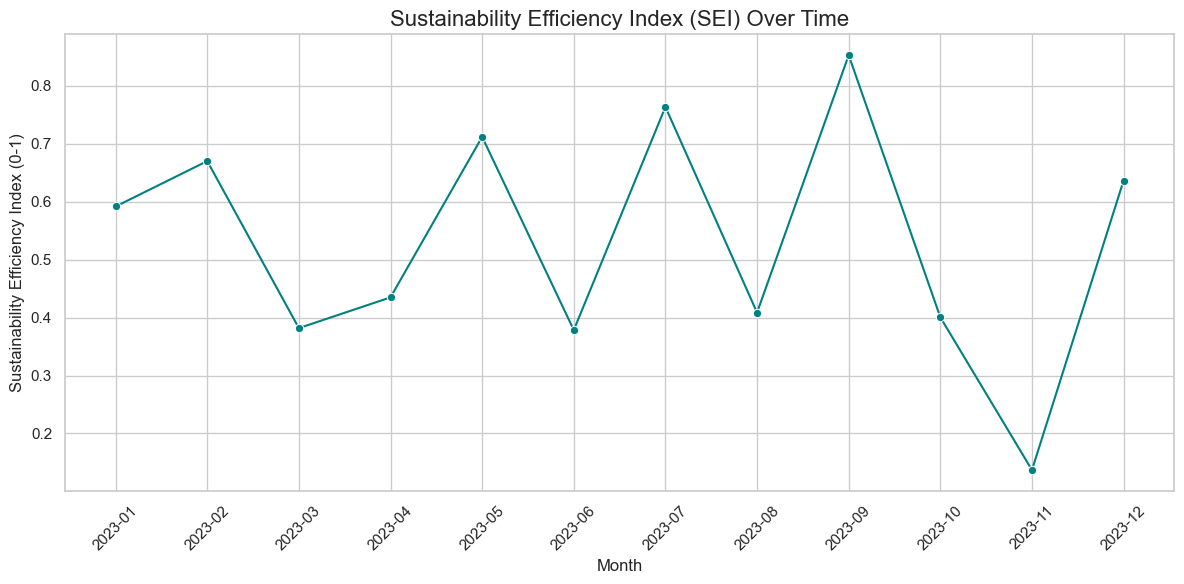

In [10]:
# Plot the Sustainability Efficiency Index trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sei_data, x="Month", y="Sustainability_Efficiency_Index", marker="o", color="teal")
plt.title("Sustainability Efficiency Index (SEI) Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sustainability Efficiency Index (0-1)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Display months with best and worst performance
best_month = sei_data.loc[sei_data["Sustainability_Efficiency_Index"].idxmax()]
worst_month = sei_data.loc[sei_data["Sustainability_Efficiency_Index"].idxmin()]

best_month, worst_month

(Month                               2023-09
 Sustainability_Efficiency_Index    0.853097
 Name: 8, dtype: object,
 Month                               2023-11
 Sustainability_Efficiency_Index    0.136903
 Name: 10, dtype: object)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
11:21:00 - cmdstanpy - INFO - Chain [1] start processing
11:21:04 - cmdstanpy - INFO - Chain [1] done processing


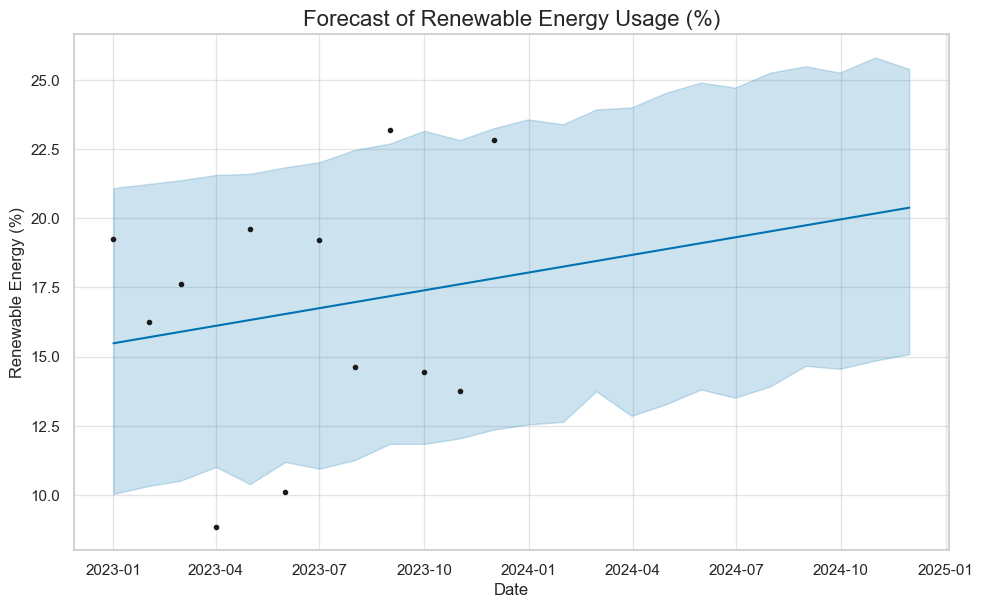

,ds,yhat,yhat_lower,yhat_upper
12,2023-12-31,18.033516,12.543005,23.576370
13,2024-01-31,18.250909,12.640881,23.398150
14,2024-02-29,18.454276,13.745354,23.935091
15,2024-03-31,18.671669,12.857557,24.005145
16,2024-04-30,18.882049,13.270217,24.533388
17,2024-05-31,19.099442,13.809178,24.908251
18,2024-06-30,19.309822,13.512431,24.724496
19,2024-07-31,19.527214,13.921821,25.266749
20,2024-08-31,19.744607,14.664213,25.495185
21,2024-09-30,19.954987,14.556158,25.265718


In [12]:
from prophet import Prophet

# Prepare the data for Prophet
forecast_data = df[["Month", "Renewable_Energy_%"]].copy()
forecast_data.rename(columns={"Month": "ds", "Renewable_Energy_%": "y"}, inplace=True)

# Convert 'ds' to datetime
forecast_data["ds"] = pd.to_datetime(forecast_data["ds"])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(forecast_data)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=12, freq="ME")  # Forecast for 12 months
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecast of Renewable Energy Usage (%)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Renewable Energy (%)", fontsize=12)
plt.show()

# Display forecasted values for the next 12 months
forecast.tail(12)[["ds", "yhat", "yhat_lower", "yhat_upper"]]


Mean Absolute Error (MAE): 3.81
Mean Absolute Percentage Error (MAPE): 26.73%
Root Mean Squared Error (RMSE): 4.27


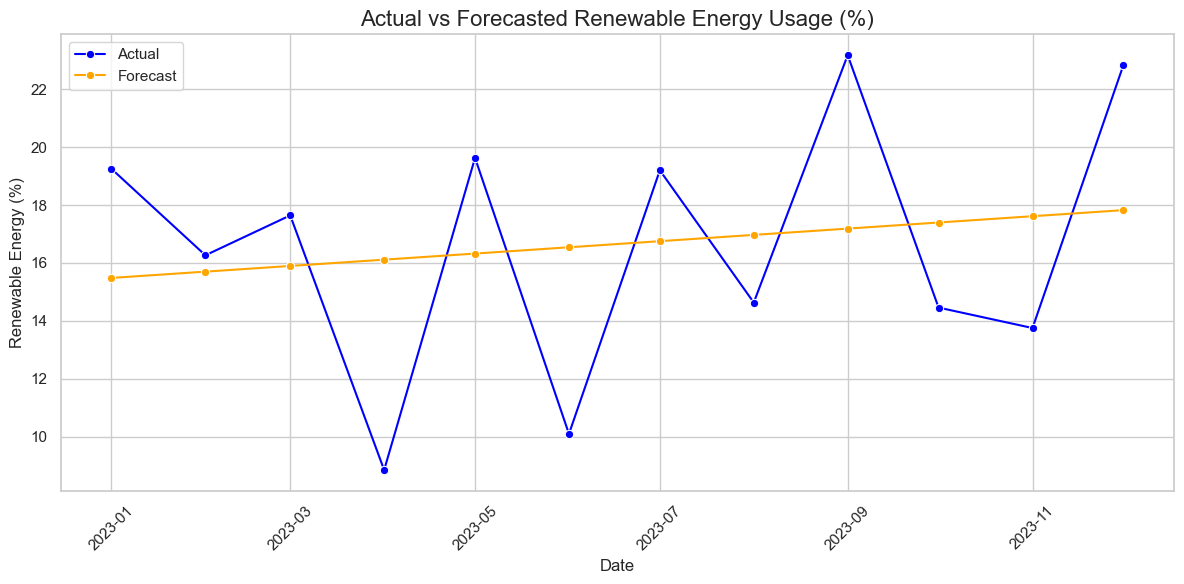

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Extract forecasted values for the original time period
forecast_subset = forecast[forecast["ds"].isin(forecast_data["ds"])]
comparison = forecast_subset[["ds", "yhat"]].copy()
comparison["Actual"] = forecast_data["y"].values

# Calculate Errors
comparison["Error"] = comparison["Actual"] - comparison["yhat"]
mae = mean_absolute_error(comparison["Actual"], comparison["yhat"])
mape = np.mean(np.abs(comparison["Error"] / comparison["Actual"])) * 100
rmse = np.sqrt(mean_squared_error(comparison["Actual"], comparison["yhat"]))

# Print Error Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize Actual vs Forecast
plt.figure(figsize=(12, 6))
sns.lineplot(x="ds", y="Actual", data=comparison, label="Actual", marker="o", color="blue")
sns.lineplot(x="ds", y="yhat", data=comparison, label="Forecast", marker="o", color="orange")
plt.title("Actual vs Forecasted Renewable Energy Usage (%)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Renewable Energy (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


11:21:08 - cmdstanpy - INFO - Chain [1] start processing
11:21:08 - cmdstanpy - INFO - Chain [1] done processing


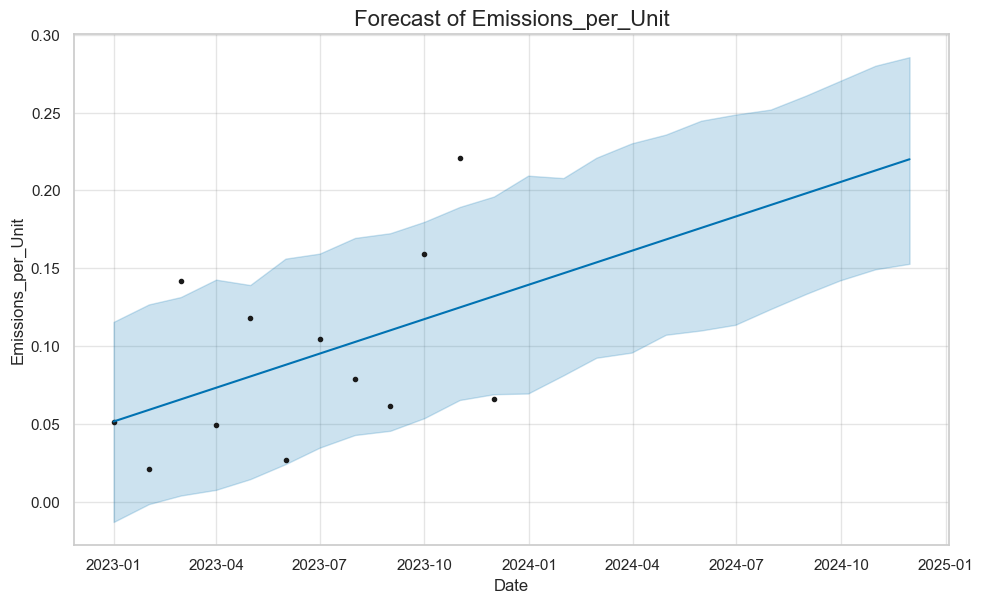

,ds,yhat,yhat_lower,yhat_upper
12,2023-12-31,0.139380,0.069734,0.209480
13,2024-01-31,0.146842,0.081368,0.207931
14,2024-02-29,0.153822,0.092672,0.220993
15,2024-03-31,0.161283,0.095985,0.230205
16,2024-04-30,0.168504,0.107416,0.235832
17,2024-05-31,0.175966,0.110172,0.244736
18,2024-06-30,0.183186,0.113802,0.248629
19,2024-07-31,0.190648,0.123887,0.251879
20,2024-08-31,0.198109,0.133562,0.260825
21,2024-09-30,0.205330,0.142301,0.270258


In [14]:


# Prepare the data for Prophet
forecast_data = df[["Month", "Emissions_per_Unit"]].copy()
forecast_data.rename(columns={"Month": "ds", "Emissions_per_Unit": "y"}, inplace=True)

# Convert 'ds' to datetime
forecast_data["ds"] = pd.to_datetime(forecast_data["ds"])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(forecast_data)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=12, freq="ME")  # Forecast for 12 months
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecast of Emissions_per_Unit", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Emissions_per_Unit", fontsize=12)
plt.show()

# Display forecasted values for the next 12 months
forecast.tail(12)[["ds", "yhat", "yhat_lower", "yhat_upper"]]


Mean Absolute Error (MAE): 0.04
Mean Absolute Percentage Error (MAPE): 68.84%
Root Mean Squared Error (RMSE): 0.05


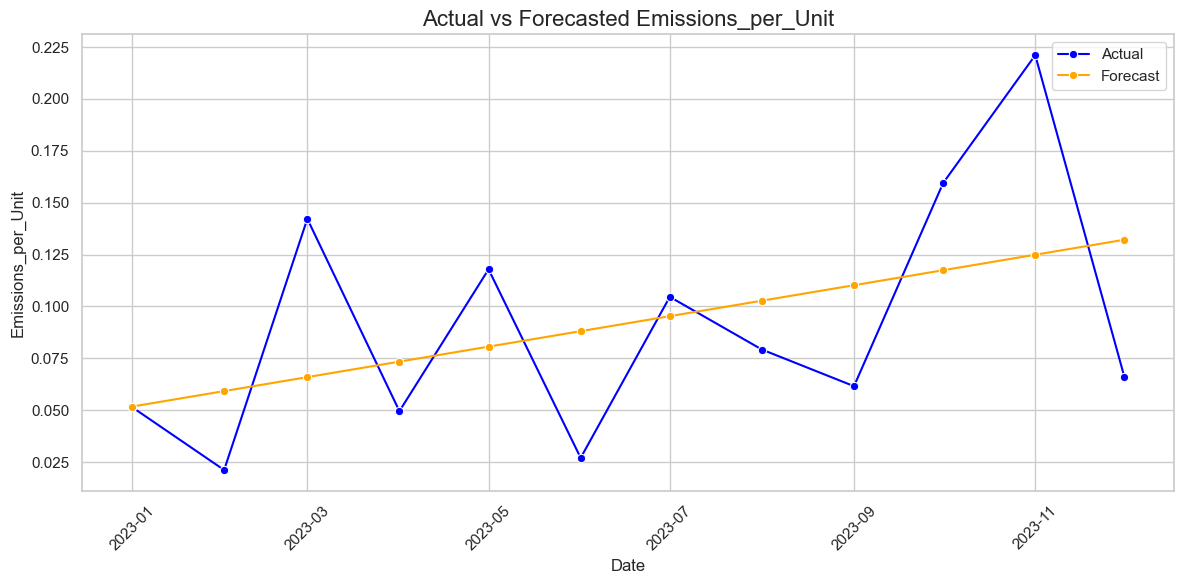

In [15]:


# Extract forecasted values for the original time period
forecast_subset = forecast[forecast["ds"].isin(forecast_data["ds"])]
comparison = forecast_subset[["ds", "yhat"]].copy()
comparison["Actual"] = forecast_data["y"].values

# Calculate Errors
comparison["Error"] = comparison["Actual"] - comparison["yhat"]
mae = mean_absolute_error(comparison["Actual"], comparison["yhat"])
mape = np.mean(np.abs(comparison["Error"] / comparison["Actual"])) * 100
rmse = np.sqrt(mean_squared_error(comparison["Actual"], comparison["yhat"]))

# Print Error Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize Actual vs Forecast
plt.figure(figsize=(12, 6))
sns.lineplot(x="ds", y="Actual", data=comparison, label="Actual", marker="o", color="blue")
sns.lineplot(x="ds", y="yhat", data=comparison, label="Forecast", marker="o", color="orange")
plt.title("Actual vs Forecasted Emissions_per_Unit", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Emissions_per_Unit", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:11 - cmdstanpy - INFO - Chain [1] done processing


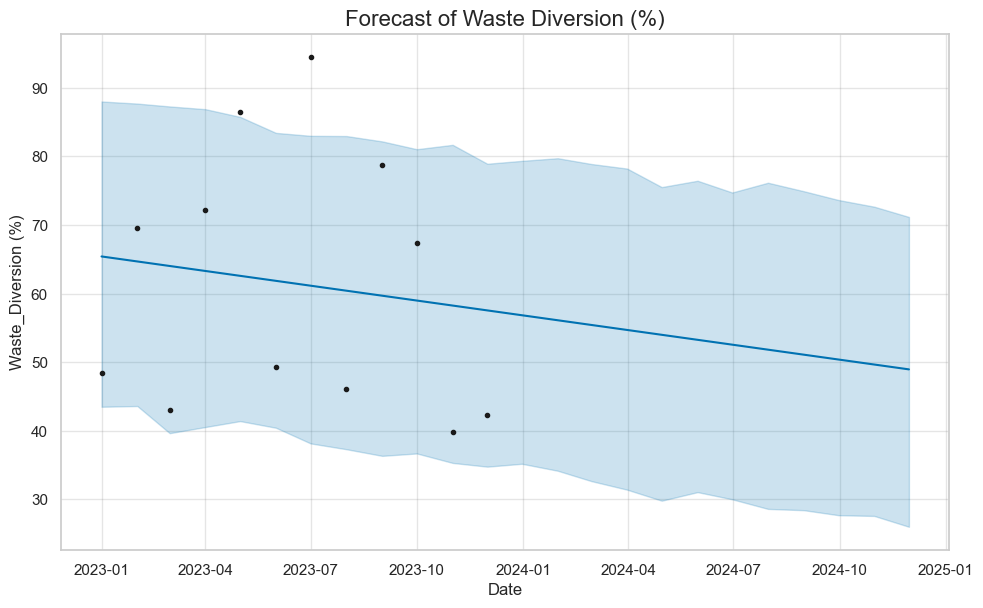

,ds,yhat,yhat_lower,yhat_upper
12,2023-12-31,56.849216,35.201476,79.353757
13,2024-01-31,56.119268,34.184373,79.737693
14,2024-02-29,55.436413,32.679756,78.897950
15,2024-03-31,54.706466,31.427269,78.228507
16,2024-04-30,54.000065,29.822312,75.529277
17,2024-05-31,53.270117,31.069528,76.453322
18,2024-06-30,52.563716,30.026465,74.742041
19,2024-07-31,51.833768,28.623858,76.164316
20,2024-08-31,51.103820,28.436448,74.928243
21,2024-09-30,50.397419,27.707985,73.647991


In [16]:


# Prepare the data for Prophet
forecast_data = df[["Month", "Waste_Diversion_%"]].copy()
forecast_data.rename(columns={"Month": "ds", "Waste_Diversion_%": "y"}, inplace=True)

# Convert 'ds' to datetime
forecast_data["ds"] = pd.to_datetime(forecast_data["ds"])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(forecast_data)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=12, freq="ME")  # Forecast for 12 months
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecast of Waste Diversion (%)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Waste_Diversion (%)", fontsize=12)
plt.show()

# Display forecasted values for the next 12 months
forecast.tail(12)[["ds", "yhat", "yhat_lower", "yhat_upper"]]


Mean Absolute Error (MAE): 16.40
Mean Absolute Percentage Error (MAPE): 28.45%
Root Mean Squared Error (RMSE): 17.97


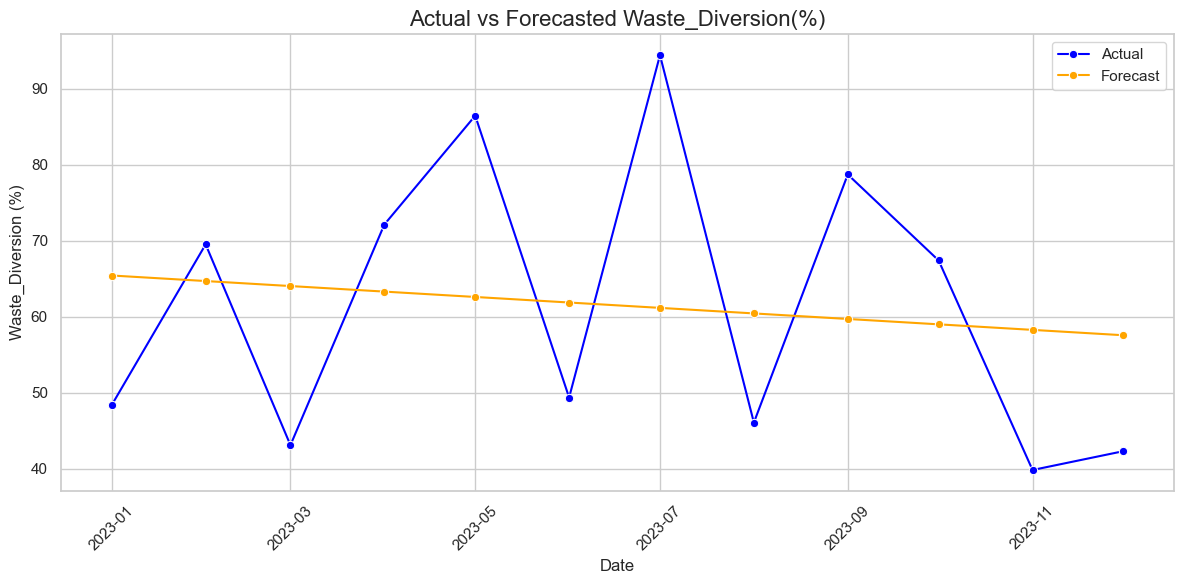

In [17]:

# Extract forecasted values for the original time period
forecast_subset = forecast[forecast["ds"].isin(forecast_data["ds"])]
comparison = forecast_subset[["ds", "yhat"]].copy()
comparison["Actual"] = forecast_data["y"].values

# Calculate Errors
comparison["Error"] = comparison["Actual"] - comparison["yhat"]
mae = mean_absolute_error(comparison["Actual"], comparison["yhat"])
mape = np.mean(np.abs(comparison["Error"] / comparison["Actual"])) * 100
rmse = np.sqrt(mean_squared_error(comparison["Actual"], comparison["yhat"]))

# Print Error Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize Actual vs Forecast
plt.figure(figsize=(12, 6))
sns.lineplot(x="ds", y="Actual", data=comparison, label="Actual", marker="o", color="blue")
sns.lineplot(x="ds", y="yhat", data=comparison, label="Forecast", marker="o", color="orange")
plt.title("Actual vs Forecasted Waste_Diversion(%)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Waste_Diversion (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


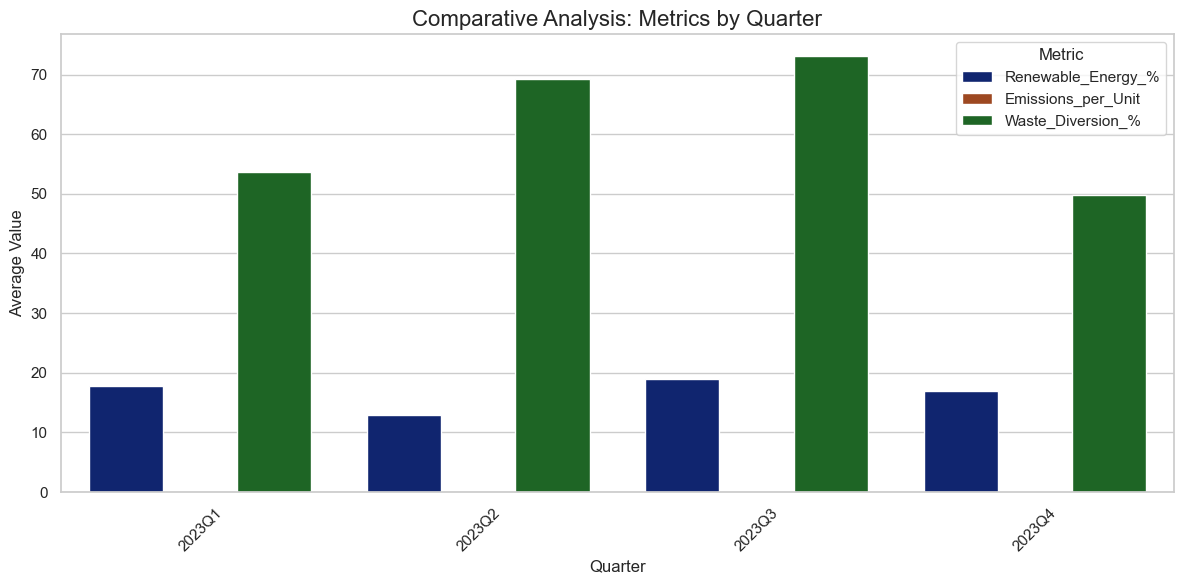

In [18]:
# Add a 'Quarter' column to the dataset
df['Quarter'] = pd.to_datetime(df['Month']).dt.to_period('Q')

# Aggregate data by Quarter
quarterly_summary = df.groupby('Quarter').agg({
    'Renewable_Energy_%': 'mean',
    'Emissions_per_Unit': 'mean',
    'Waste_Diversion_%': 'mean'
}).reset_index()

# Visualization: Compare metrics across quarters
quarterly_summary_melted = quarterly_summary.melt(id_vars='Quarter', var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 6))
sns.barplot(x='Quarter', y='Value', hue='Metric', data=quarterly_summary_melted, palette='dark')
plt.title('Comparative Analysis: Metrics by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import f_oneway

# Perform ANOVA for Waste Diversion Rates across Quarters
anova_result = f_oneway(
    *[group['Waste_Diversion_%'].values for _, group in df.groupby('Quarter')]
)

print(f"ANOVA p-value: {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("There are significant differences in Waste Diversion Rates across quarters.")
else:
    print("No significant differences in Waste Diversion Rates across quarters.")


ANOVA p-value: 0.3927
No significant differences in Waste Diversion Rates across quarters.


In [20]:
df.head()

,Month,Electricity_Usage_kWh,Gas_Usage_kWh,Renewable_Usage_kWh,CO2_Emissions_Tons,Waste_Generated_Tons,Waste_Recycled_Tons,Waste_Composted_Tons,Waste_Landfilled_Tons,Units_Produced,Energy_Efficiency,Waste_to_Recycling_Ratio,Emissions_per_Unit,Renewable_Energy_%,Recycling_Rate_%,Waste_Diversion_%,Sustainability_Efficiency_Index,Quarter
0,2023-01,17270,7391,4747,190.099850,89.106061,29.796223,13.305339,46.598387,3690,0.149629,0.334391,0.051518,19.249017,33.439053,48.371078,0.591892,2023Q1
1,2023-02,10860,7433,2975,102.652992,68.223609,37.113319,10.312728,44.001543,4840,0.264582,0.543995,0.021209,16.263051,54.399525,69.515595,0.670201,2023Q1
2,2023-03,15390,6184,3806,288.440351,125.536141,35.625028,18.468030,27.978027,2028,0.094002,0.283783,0.142229,17.641606,28.378304,43.089629,0.381861,2023Q1
3,2023-04,15191,9555,2189,212.657644,92.515587,48.835161,17.897630,13.816405,4289,0.173321,0.527859,0.049582,8.845874,52.785873,72.131403,0.434951,2023Q2
4,2023-05,15734,8385,4734,177.083301,70.794166,45.336015,15.869763,24.832730,1502,0.062275,0.640392,0.117898,19.627679,64.039197,86.455964,0.712073,2023Q2


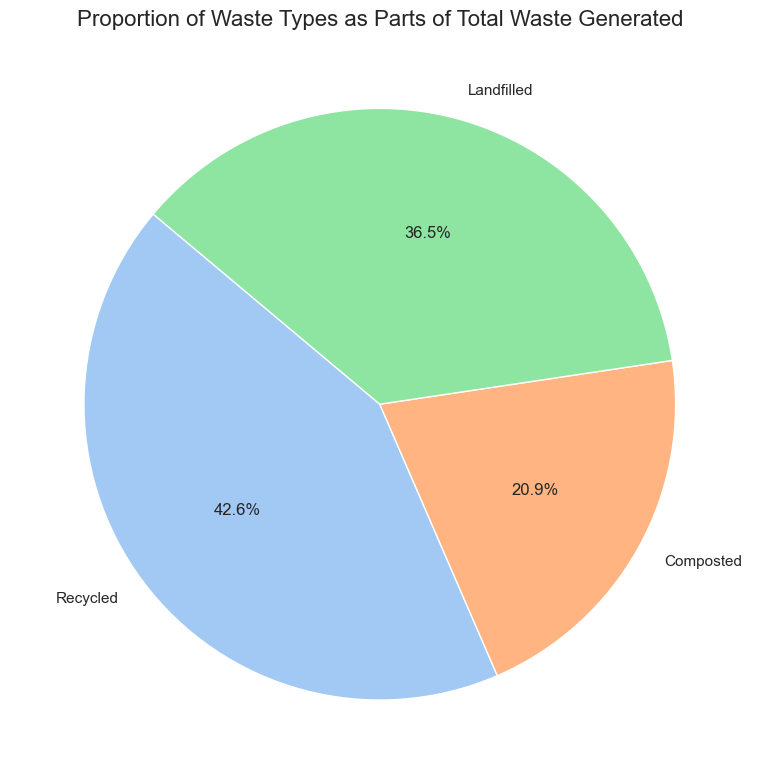

Recycled      42.616337
Composted     20.859063
Landfilled    36.524600
dtype: float64

In [21]:



waste_totals = {
    'Recycled': df['Waste_Recycled_Tons'].sum(),
    'Composted': df['Waste_Composted_Tons'].sum(),
    'Landfilled': df['Waste_Landfilled_Tons'].sum()
}

# Convert to a DataFrame for calculation and visualization
waste_totals_df = pd.Series(waste_totals)
waste_percentages = (waste_totals_df / waste_totals_df.sum()) * 100

# Create the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    waste_percentages, 
    labels=waste_percentages.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('pastel'),
    startangle=140
)
plt.title('Proportion of Waste Types as Parts of Total Waste Generated', fontsize=16)
plt.tight_layout()
plt.show()

waste_percentages


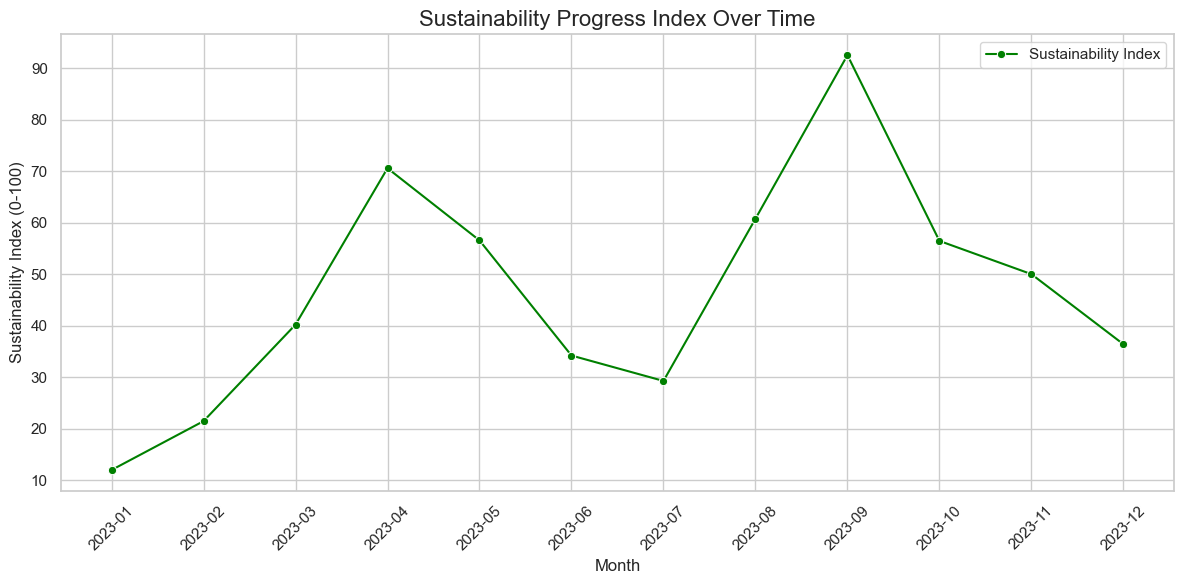

In [22]:
# Assuming df contains 'Month', 'Recycled', 'Composted

# Normalize recycling and composting rates to 0-100
df['Recycling_Normalized'] = (df['Waste_Recycled_Tons'] - df['Waste_Recycled_Tons'].min()) / (df['Waste_Recycled_Tons'].max() - df['Waste_Recycled_Tons'].min()) * 100
df['Composting_Normalized'] = (df['Waste_Composted_Tons'] - df['Waste_Composted_Tons'].min()) / (df['Waste_Composted_Tons'].max() - df['Waste_Composted_Tons'].min()) * 100

# Define weights for Recycling and Composting (e.g., 50% each)
recycling_weight = 0.5
composting_weight = 0.5

# Calculate Sustainability Index
df['Sustainability_Index'] = (
    df['Recycling_Normalized'] * recycling_weight +
    df['Composting_Normalized'] * composting_weight
)

# Visualization: Sustainability Index Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sustainability_Index', data=df, marker='o', label='Sustainability Index', color='green')
plt.title('Sustainability Progress Index Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sustainability Index (0-100)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


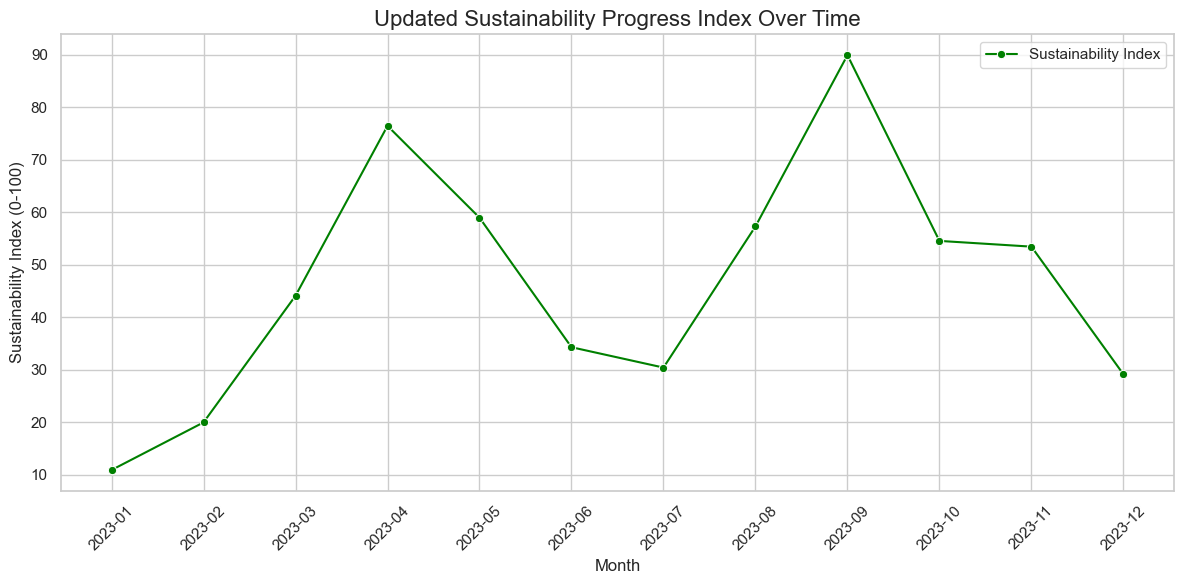

In [23]:
# Normalize landfill data (inverted to reflect reduction as positive)
df['Recycling_Normalized'] = (df['Waste_Recycled_Tons'] - df['Waste_Recycled_Tons'].min()) / (df['Waste_Recycled_Tons'].max() - df['Waste_Recycled_Tons'].min()) * 100
df['Composting_Normalized'] = (df['Waste_Composted_Tons'] - df['Waste_Composted_Tons'].min()) / (df['Waste_Composted_Tons'].max() - df['Waste_Composted_Tons'].min()) * 100
df['Landfill_Normalized'] = (df['Waste_Landfilled_Tons'].max() - df['Waste_Landfilled_Tons']) / (df['Waste_Landfilled_Tons'].max() - df['Waste_Landfilled_Tons'].min()) * 100

# Adjust weights (customize as needed)
recycling_weight = 0.4
composting_weight = 0.4
landfill_weight = 0.2

# Update Sustainability Index calculation
df['Sustainability_Index'] = (
    df['Recycling_Normalized'] * recycling_weight +
    df['Composting_Normalized'] * composting_weight +
    df['Landfill_Normalized'] * landfill_weight
)

# Visualization: Updated Sustainability Index
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sustainability_Index', data=df, marker='o', label='Sustainability Index', color='green')
plt.title('Updated Sustainability Progress Index Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sustainability Index (0-100)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
df.head()

,Month,Electricity_Usage_kWh,Gas_Usage_kWh,Renewable_Usage_kWh,CO2_Emissions_Tons,Waste_Generated_Tons,Waste_Recycled_Tons,Waste_Composted_Tons,Waste_Landfilled_Tons,Units_Produced,...,Emissions_per_Unit,Renewable_Energy_%,Recycling_Rate_%,Waste_Diversion_%,Sustainability_Efficiency_Index,Quarter,Recycling_Normalized,Composting_Normalized,Sustainability_Index,Landfill_Normalized
0,2023-01,17270,7391,4747,190.099850,89.106061,29.796223,13.305339,46.598387,3690,...,0.051518,19.249017,33.439053,48.371078,0.591892,2023Q1,7.332773,16.573518,10.857787,6.476354
1,2023-02,10860,7433,2975,102.652992,68.223609,37.113319,10.312728,44.001543,4840,...,0.021209,16.263051,54.399525,69.515595,0.670201,2023Q1,42.719213,0.170637,19.932917,13.884884
2,2023-03,15390,6184,3806,288.440351,125.536141,35.625028,18.468030,27.978027,2028,...,0.142229,17.641606,28.378304,43.089629,0.381861,2023Q1,35.521640,44.870885,44.076678,59.598339
3,2023-04,15191,9555,2189,212.657644,92.515587,48.835161,17.897630,13.816405,4289,...,0.049582,8.845874,52.785873,72.131403,0.434951,2023Q2,99.407581,41.744454,76.460814,100.000000
4,2023-05,15734,8385,4734,177.083301,70.794166,45.336015,15.869763,24.832730,1502,...,0.117898,19.627679,64.039197,86.455964,0.712073,2023Q2,82.485254,30.629457,58.960194,68.571549


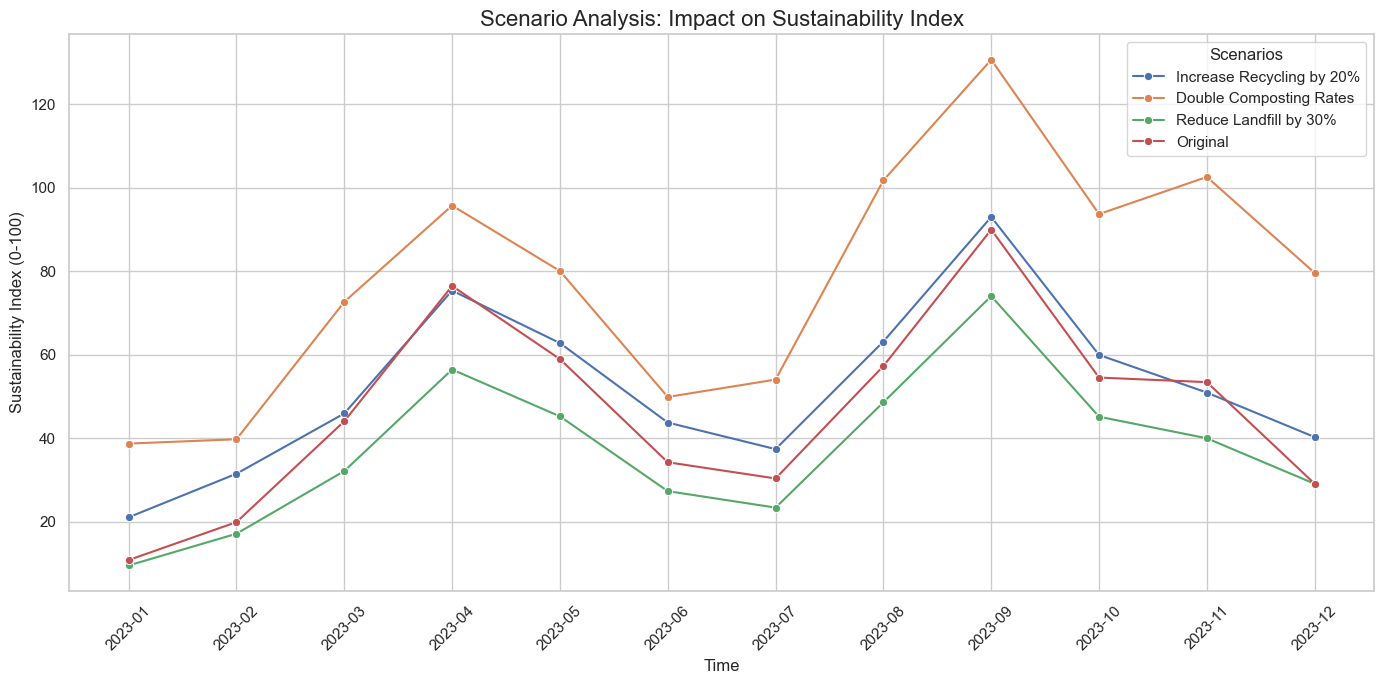

In [25]:
# Define hypothetical scenarios
scenarios = {
    "Increase Recycling by 20%": df['Waste_Recycled_Tons'] * 1.2,
    "Double Composting Rates": df['Waste_Composted_Tons'] * 2,
    "Reduce Landfill by 30%": df['Waste_Landfilled_Tons'] * 0.7
}

# Create a DataFrame to store results
scenario_results = pd.DataFrame()

for scenario, values in scenarios.items():
    temp_df = df.copy()
    # Update relevant column based on the scenario
    if "Recycling" in scenario:
        temp_df['Waste_Recycled_Tons'] = values
    elif "Composting" in scenario:
        temp_df['Waste_Composted_Tons'] = values
    elif "Landfill" in scenario:
        temp_df['Waste_Landfilled_Tons'] = values
    
    # Recalculate normalization
    temp_df['Recycling_Normalized'] = (temp_df['Waste_Recycled_Tons'] - df['Waste_Recycled_Tons'].min()) / (df['Waste_Recycled_Tons'].max() - df['Waste_Recycled_Tons'].min()) * 100
    temp_df['Composting_Normalized'] = (temp_df['Waste_Composted_Tons'] - df['Waste_Composted_Tons'].min()) / (df['Waste_Composted_Tons'].max() - df['Waste_Composted_Tons'].min()) * 100
    
    # Recalculate the Sustainability Index
    temp_df['Sustainability_Index'] = (
        temp_df['Recycling_Normalized'] * recycling_weight +
        temp_df['Composting_Normalized'] * composting_weight
    )
    
    # Store the results
    scenario_results[scenario] = temp_df['Sustainability_Index']

# Add the original index for comparison
scenario_results['Original'] = df['Sustainability_Index']

# Visualization: Compare scenarios
plt.figure(figsize=(14, 7))
for column in scenario_results.columns:
    sns.lineplot(
        data=scenario_results[column], 
        label=column, 
        marker='o'
    )

plt.title('Scenario Analysis: Impact on Sustainability Index', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sustainability Index (0-100)', fontsize=12)
plt.legend(title="Scenarios")
plt.xticks(range(len(df['Month'])), df['Month'], rotation=45)
plt.tight_layout()
plt.show()
